## 배깅 분류기
- 배깅 : bootstrap을 aggregation한다는 의미를 가진 합성어
- 모델의 분산을 줄이는 기법
<br>
<br>

각 의사결정 트리 분류기의 예측 : <h3>$  \hat{f_{1}}(x), \hat{f_{2}}(x), \hat{f_{3}}(x), ... , \hat{f_{B}}(x) $</h3>
<h3>$  \hat{f_{avg}}(x) =  \frac{1}{B}\sum_{b=1}^{B}\hat{f_{b}}(x) $</h3>

- 배깅은 열은 모두 선택, 행은 표본을 추출
- 때문에, 대다수의 트리가 비슷해질 수 있다.


||||||||||
|--|--|--|--|--|--|--|--|--|
|O|O|O|O|O|O|O|O|O|
|O|O|O|O|O|O|O|O|O|
|X|X|X|X|X|X|X|X|X|
|X|X|X|X|X|X|X|X|X|
|O|O|O|O|O|O|O|O|O|
|X|X|X|X|X|X|X|X|X|
|O|O|O|O|O|O|O|O|O|

In [1]:
# 모듈 가져오기
import pandas as pd
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
# 데이터 가져오기
hrattr = pd.read_csv('./Data/HR_Employee_Attrition.csv')

In [4]:
# 데이터 확인
hrattr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# 데이터 컬럼 정보 및 데이터 타입 확인
hrattr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
# Attrition : 종속변수 => Yes, NO -> 1, 0으로 변환
hrattr['Attrition_ind'] = 0
hrattr.loc[hrattr['Attrition'] == 'Yes', 'Attrition_ind'] = 1

In [14]:
# 데이터 프레임 재확인
hrattr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
# object, int 데이터 구분해서 컬럼 정의하기
discrete_columns = list()
continuous_columns = list()
dtypes = list(hrattr.dtypes)
for dtype in enumerate(dtypes):
    if dtype[1] == 'object':
        discrete_columns.append(hrattr.columns[dtype[0]])    
    elif dtype[1] == 'int64':
        continuous_columns.append(hrattr.columns[dtype[0]])    

In [17]:
# 알파벳 순으로 정렬
discrete_columns = sorted(discrete_columns)
continuous_columns = sorted(continuous_columns)

In [18]:
# 데이터 확인
print(discrete_columns)
print(continuous_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
['Age', 'Attrition_ind', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [21]:
# object 변수 더미 변수화 시키기
# 이 때, Attrition은 연속변수로 변환 했기 때문에 제거한다.
# discrete_df 만들기
dummies_df = list()
for col in discrete_columns[1:]:
    dummies_df.append(pd.get_dummies(hrattr[col], prefix = col))
discrete_df = pd.concat(dummies_df, axis = 1)

In [22]:
# int 변수 데이터 프레임 만들기
continuous_df = hrattr[continuous_columns]

In [23]:
# 통합 데이터 프레임 만들기
hrattr_new = pd.concat([discrete_df, continuous_df], axis = 1)

In [24]:
# 통합 데이터 프레임 확인하기
hrattr_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BusinessTravel_Non-Travel          1470 non-null   uint8
 1   BusinessTravel_Travel_Frequently   1470 non-null   uint8
 2   BusinessTravel_Travel_Rarely       1470 non-null   uint8
 3   Department_Human Resources         1470 non-null   uint8
 4   Department_Research & Development  1470 non-null   uint8
 5   Department_Sales                   1470 non-null   uint8
 6   EducationField_Human Resources     1470 non-null   uint8
 7   EducationField_Life Sciences       1470 non-null   uint8
 8   EducationField_Marketing           1470 non-null   uint8
 9   EducationField_Medical             1470 non-null   uint8
 10  EducationField_Other               1470 non-null   uint8
 11  EducationField_Technical Degree    1470 non-null   uint8
 12  Gender_Female       

In [25]:
# 필요없는 컬럼 제거하기
remove_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18_Y', 'StandardHours']
hrattr_new.drop(remove_cols, axis = 1, inplace = True)

In [88]:
# 데이트 프레임 재확인
hrattr_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BusinessTravel_Non-Travel          1470 non-null   uint8
 1   BusinessTravel_Travel_Frequently   1470 non-null   uint8
 2   BusinessTravel_Travel_Rarely       1470 non-null   uint8
 3   Department_Human Resources         1470 non-null   uint8
 4   Department_Research & Development  1470 non-null   uint8
 5   Department_Sales                   1470 non-null   uint8
 6   EducationField_Human Resources     1470 non-null   uint8
 7   EducationField_Life Sciences       1470 non-null   uint8
 8   EducationField_Marketing           1470 non-null   uint8
 9   EducationField_Medical             1470 non-null   uint8
 10  EducationField_Other               1470 non-null   uint8
 11  EducationField_Technical Degree    1470 non-null   uint8
 12  Gender_Female       

In [28]:
# train, test 데이터 분할하기
x_train, x_test, y_train, y_test = train_test_split(hrattr_new.drop('Attrition_ind', axis = 1), hrattr_new['Attrition_ind'], random_state = 42, train_size = 0.7)

In [29]:
# 데이터 분할 상태 확인
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1029, 51), (441, 51), (1029,), (441,))

In [44]:
# 모듈 가져오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [45]:
# 모델 생성
dt_fit = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 5,
    min_samples_split = 2,
    min_samples_leaf = 1,
    random_state = 42,
    class_weight = {
        0 : 0.3,
        1 : 0.7
    }
)

In [46]:
# 배깅 모델 가져오기
# 배깅을 위한 매개변수 설정
bag_fit = BaggingClassifier(
    base_estimator = dt_fit,
    n_estimators = 5000,
    max_samples = 0.67, # 각 트리에서 관측값의 67%를 활용한다는 의미
    max_features = 1.0, # 모든 컬럼을 사용한다는 의미
    bootstrap = True,
    bootstrap_features = False,
    n_jobs = -1,
    random_state = 42
)


In [47]:
# 배깅을 이용한 모델 학습
bag_fit.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.3,
                                                                      1: 0.7},
                                                        max_depth=5,
                                                        random_state=42),
                  max_samples=0.67, n_estimators=5000, n_jobs=-1,
                  random_state=42)

In [48]:
# confusion matrix - 학습
pd.crosstab(y_train, bag_fit.predict(x_train), rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,846,7
1,66,110


In [49]:
# accuracy - 학습
accuracy_score(y_train, bag_fit.predict(x_train))

0.9290573372206026

In [52]:
# classification_report - 학습
print(classification_report(y_train, bag_fit.predict(x_train)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       853
           1       0.94      0.62      0.75       176

    accuracy                           0.93      1029
   macro avg       0.93      0.81      0.85      1029
weighted avg       0.93      0.93      0.92      1029



In [53]:
# confusion matrix - 테스트
pd.crosstab(y_test, bag_fit.predict(x_test), rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,372,8
1,49,12


In [54]:
# accuracy - 테스트
accuracy_score(y_test, bag_fit.predict(x_test))

0.8707482993197279

In [55]:
# classification_report - 학습
print(classification_report(y_test, bag_fit.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       380
           1       0.60      0.20      0.30        61

    accuracy                           0.87       441
   macro avg       0.74      0.59      0.61       441
weighted avg       0.84      0.87      0.84       441



## 랜덤 포레스트 분류기

- 전체 변수를 선택하지 않고 일부의 예측 변수만 선택한다
- p개 변수 중 선택할 m의 값을 정하는 것 => m = p/3이 통상적 => 개별 트리 간의 상관관계 문제를 피할 수 있다.

||||||||||
|--|--|--|--|--|--|--|--|--|
|X|X|X|X|X|X|X|X|X|
|X|X|X|X|X|X|X|X|X|
|O|X|O|O|X|X|O|X|O|
|O|X|O|O|X|X|O|X|O|
|X|X|X|X|X|X|X|X|X|
|X|X|X|X|X|X|X|X|X|
|X|O|O|O|O|X|X|O|X|
|X|O|O|O|O|X|X|O|X|

In [56]:
# 랜덤 포레스트 분류기
from sklearn.ensemble import RandomForestClassifier

In [58]:
# 모델 생성 및 매개변수 설정
rf_fit = RandomForestClassifier(
    n_estimators = 5000, criterion = 'gini',
    max_depth = 5,
    min_samples_split = 2,
    min_samples_leaf = 1,
    bootstrap = True,
    max_features = 'auto',
    random_state = 42,
    class_weight = {
        0 : 0.3,
        1 : 0.7
    }
)

In [59]:
# 모델 학습
rf_fit.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       n_estimators=5000, random_state=42)

In [60]:
# confusion matrix - 학습
pd.crosstab(y_train, rf_fit.predict(x_train), rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,841,12
1,76,100


In [62]:
# accuracy - 학습
accuracy_score(y_train, rf_fit.predict(x_train))

0.9144800777453839

In [64]:
# classfication_report - 학습
print(classification_report(y_train, rf_fit.predict(x_train)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       853
           1       0.89      0.57      0.69       176

    accuracy                           0.91      1029
   macro avg       0.90      0.78      0.82      1029
weighted avg       0.91      0.91      0.91      1029



In [65]:
# confusion matrix - 테스트
pd.crosstab(y_test, rf_fit.predict(x_test), rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,373,7
1,47,14


In [66]:
# accuracy - 학습
accuracy_score(y_test, rf_fit.predict(x_test))

0.8775510204081632

In [67]:
# classfication_report - 학습
print(classification_report(y_test, rf_fit.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       380
           1       0.67      0.23      0.34        61

    accuracy                           0.88       441
   macro avg       0.78      0.61      0.64       441
weighted avg       0.86      0.88      0.85       441



In [102]:
# 지니의 평균값 감소를 이용한 변수 중요도 그래프
model_ranks = pd.Series(rf_fit.feature_importances_, index = x_train.columns, name = 'Importance').sort_values(ascending = False)

In [103]:
# 데이터 확인
model_ranks

MonthlyIncome                        0.090260
OverTime_No                          0.082638
OverTime_Yes                         0.078611
Age                                  0.065269
TotalWorkingYears                    0.064851
StockOptionLevel                     0.057331
YearsAtCompany                       0.052970
MaritalStatus_Single                 0.039766
YearsInCurrentRole                   0.039658
YearsWithCurrManager                 0.037313
JobLevel                             0.036568
NumCompaniesWorked                   0.027368
DailyRate                            0.025666
DistanceFromHome                     0.023903
MonthlyRate                          0.023174
HourlyRate                           0.022534
JobSatisfaction                      0.016834
EnvironmentSatisfaction              0.016574
TrainingTimesLastYear                0.014077
JobInvolvement                       0.013810
PercentSalaryHike                    0.013713
YearsSinceLastPromotion           

In [104]:
# 인덱스명 지정
model_ranks.index.name = 'Variables'

In [105]:
# 상위 30개 변수 선정
top_features = model_ranks.iloc[:31].sort_values(ascending = True)

In [106]:
# 데이터 확인
top_features

Variables
EducationField_Technical Degree      0.007346
BusinessTravel_Travel_Frequently     0.008207
Department_Research & Development    0.008334
Department_Sales                     0.008465
Education                            0.008499
WorkLifeBalance                      0.009793
MaritalStatus_Divorced               0.010182
RelationshipSatisfaction             0.010191
JobRole_Sales Representative         0.011044
YearsSinceLastPromotion              0.013330
PercentSalaryHike                    0.013713
JobInvolvement                       0.013810
TrainingTimesLastYear                0.014077
EnvironmentSatisfaction              0.016574
JobSatisfaction                      0.016834
HourlyRate                           0.022534
MonthlyRate                          0.023174
DistanceFromHome                     0.023903
DailyRate                            0.025666
NumCompaniesWorked                   0.027368
JobLevel                             0.036568
YearsWithCurrManager    

[Text(0, 0, 'EducationField_Technical Degree'),
 Text(0, 0, 'BusinessTravel_Travel_Frequently'),
 Text(0, 0, 'Department_Research & Development'),
 Text(0, 0, 'Department_Sales'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'WorkLifeBalance'),
 Text(0, 0, 'MaritalStatus_Divorced'),
 Text(0, 0, 'RelationshipSatisfaction'),
 Text(0, 0, 'JobRole_Sales Representative'),
 Text(0, 0, 'YearsSinceLastPromotion'),
 Text(0, 0, 'PercentSalaryHike'),
 Text(0, 0, 'JobInvolvement'),
 Text(0, 0, 'TrainingTimesLastYear'),
 Text(0, 0, 'EnvironmentSatisfaction'),
 Text(0, 0, 'JobSatisfaction'),
 Text(0, 0, 'HourlyRate'),
 Text(0, 0, 'MonthlyRate'),
 Text(0, 0, 'DistanceFromHome'),
 Text(0, 0, 'DailyRate'),
 Text(0, 0, 'NumCompaniesWorked'),
 Text(0, 0, 'JobLevel'),
 Text(0, 0, 'YearsWithCurrManager'),
 Text(0, 0, 'YearsInCurrentRole'),
 Text(0, 0, 'MaritalStatus_Single'),
 Text(0, 0, 'YearsAtCompany'),
 Text(0, 0, 'StockOptionLevel'),
 Text(0, 0, 'TotalWorkingYears'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'OverTime

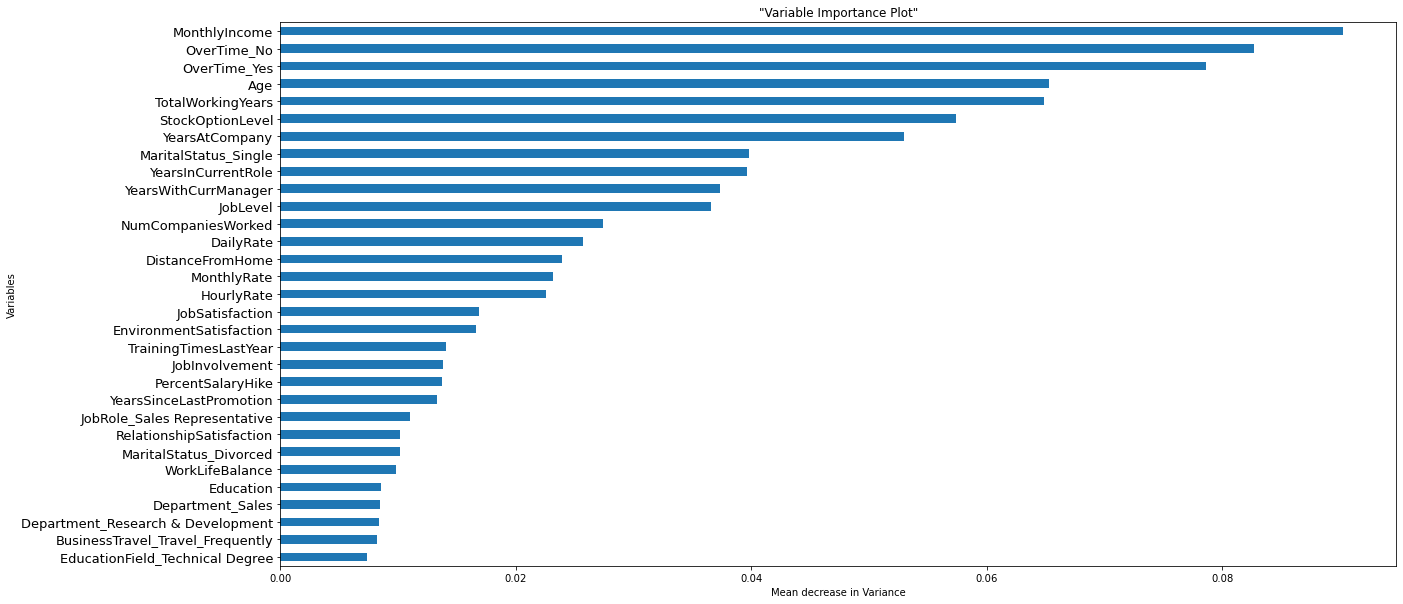

In [107]:
# 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
ax = top_features.plot(kind = 'barh')
ax.set_title('"Variable Importance Plot"')
ax.set_xlabel('Mean decrease in Variance')
ax.set_yticklabels(top_features.index, fontsize = 13)